In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#leemos los datos de petroleo.csv y energia.csv
petrodf = pd.DataFrame(pd.read_csv("/drive/notebooks/petroleo.csv"))
energiadf = pd.DataFrame(pd.read_csv("/drive/notebooks/energia.csv"))

#promedio de precios de la energia y petroleo (2011-2020)
prom_petro_price = petrodf["price"].mean()
prom_energia_price = energiadf["price"].mean()
print("PROMEDIO PRECIO PETROLEO",prom_petro_price)
print("PROMEDIO PRECIO ENERGIA", prom_energia_price)

serie_time = np.arange(3650)

PROMEDIO PRECIO PETROLEO 76.34280591294826
PROMEDIO PRECIO ENERGIA 197.32892515740488


In [2]:
#Datos desplazados
petro_dsp = petrodf["price"] - prom_petro_price
energia_dsp = energiadf["price"] - prom_energia_price

In [3]:
petro_dsp

0       18.407194
1       18.407194
2       18.497194
3       17.187194
4       19.157194
          ...    
3648   -25.052806
3649   -25.482806
3650   -25.252806
3651   -25.002806
3652   -24.542806
Name: price, Length: 3653, dtype: float64

In [4]:
energia_dsp

0      -130.306125
1      -137.216425
2      -114.516225
3      -112.935125
4      -118.156125
           ...    
3648    -65.010625
3649    -27.118425
3650    -24.005925
3651    -26.474225
3652    -51.255225
Name: price, Length: 3653, dtype: float64

In [5]:
#sumas Acumuladas desplazadas
sum_cum_petro = petro_dsp.cumsum()
sum_cum_energia = energia_dsp.cumsum()
sum_cum_petro

0       1.840719e+01
1       3.681439e+01
2       5.531158e+01
3       7.249878e+01
4       9.165597e+01
            ...     
3648    1.002812e+02
3649    7.479842e+01
3650    4.954561e+01
3651    2.454281e+01
3652   -1.477645e-10
Name: price, Length: 3653, dtype: float64

In [6]:
sum_cum_energia

0      -1.303061e+02
1      -2.675226e+02
2      -3.820388e+02
3      -4.949739e+02
4      -6.131300e+02
            ...     
3648    1.288538e+02
3649    1.017354e+02
3650    7.772945e+01
3651    5.125523e+01
3652   -7.295853e-11
Name: price, Length: 3653, dtype: float64

In [7]:
#Convertimos los datos en Pandas a Numpy(Arrays)
sum_cum_petro.to_numpy
sum_cum_energia.to_numpy



<bound method IndexOpsMixin.to_numpy of 0      -1.303061e+02
1      -2.675226e+02
2      -3.820388e+02
3      -4.949739e+02
4      -6.131300e+02
            ...     
3648    1.288538e+02
3649    1.017354e+02
3650    7.772945e+01
3651    5.125523e+01
3652   -7.295853e-11
Name: price, Length: 3653, dtype: float64>

In [8]:

def calculo_por_ventanas(tamVent, sum_cum, dibSeg, treat):
    NumVen= int(3650/tamVent)
    st = []
    for nv in range(NumVen):
        #Calculaos en la ventana numero nv(0-365)
        xR = sum_cum[nv*tamVent:((nv+1)*tamVent)]
        x = np.arange(nv*tamVent+1, ((nv+1)*tamVent)+1 )
        
        #Calculo con minimos cuadrados la recta que se aproxima a esa ventana
        rectaV = np.polyfit(x, xR, 1)
        fV = np.poly1d(rectaV)

        #Calculo de ordenadas
        ordenada = fV(x)
        st = np.append(st,(ordenada - xR)**2)
        
        if dibSeg:
            if(treat == 1):
                plt.figure(2)
                ax21.plot(x, fV(x), color = 'red', linewidth = 2.5)
            else :
                None
            
        
    valor = st.cumsum()
    valf = valor[x[-1]-1] * 1 / 3650
    return valf ** .5

    

In [9]:
#Tamaños Sugeridos
tamVenSug = []
for n in range(11, int(3650/5)):
        if int(4*(2**(1/8))**n + 0.5) <= int(3650/5):
            tamVenSug = np.append(tamVenSug, int(4*(2**(1/8))**n + 0.5))
        else :
            break

In [11]:
#Evaluamos Fn en Petroleo
Fn = []
for tamVen in tamVenSug:
    Fn = np.append(Fn, calculo_por_ventanas(int(tamVen), sum_cum_petro, False,1))
    

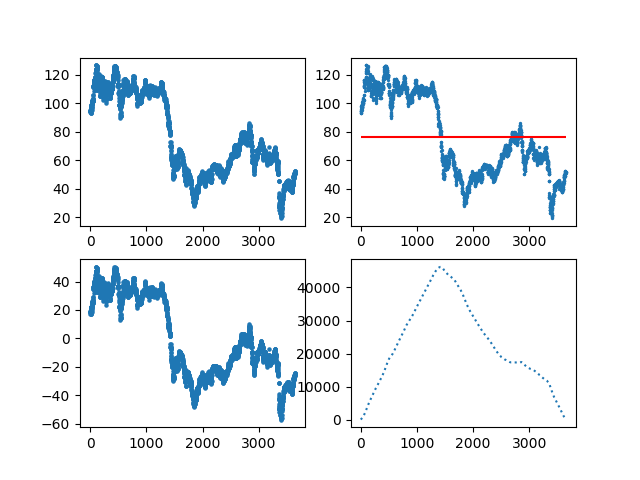

In [12]:
petrol = petrodf["price"][0:3650]
#Graficas para el dataset de petroleo
plt.figure()
plt.subplot(221)
plt.scatter(serie_time, petrol, marker = 'o', s = 5)

plt.subplot(222)
plt.hlines(prom_petro_price,0,3650,colors = 'red')
plt.scatter(serie_time, petrol, marker = 'o', s = 2)

plt.subplot(223)
plt.scatter(serie_time, petro_dsp[0:3650], marker = 'o', s = 5)

plt.subplot(224)
plt.plot(serie_time, sum_cum_petro[0:3650], linestyle = 'dotted')

plt.show()


Vn 25.0


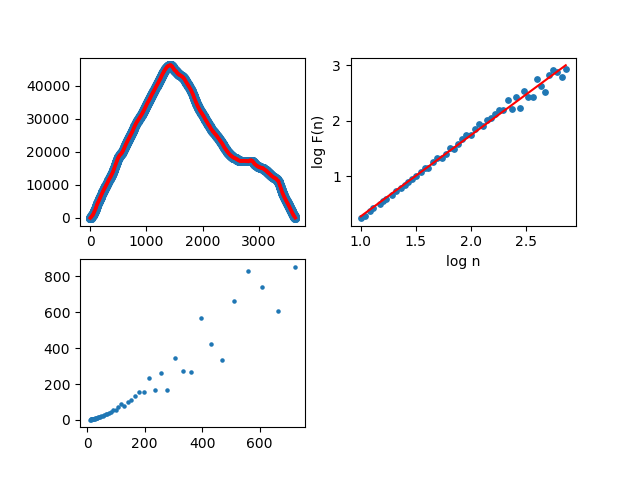

In [13]:
#Resultados para petroleo

plt.figure(2)
plt.subplot(223)
plt.scatter(tamVenSug, Fn, marker = 'o', s = 5)
plt.figure(2)
ax21 = plt.subplot(221)
ax21.scatter(serie_time, sum_cum_petro[0:3650],marker = 'o', s = 30)

tv = int(len(tamVenSug)/5)
print("Vn",tamVenSug[tv])
calculo_por_ventanas(int(tamVenSug[tv]),sum_cum_petro,True,1)

plt.subplot(222)
plt.scatter(np.log10(tamVenSug), np.log10(Fn), marker = 'o', s = 15)
plt.xlabel('log n')
plt.ylabel('log F(n)')

rectaLog = np.polyfit(np.log10(tamVenSug), np.log10(Fn), 1)
fLog = np.poly1d(rectaLog)

ejeX = np.log10(tamVenSug)
ejeY = fLog(np.log10(tamVenSug))

plt.plot(ejeX, ejeY, color = 'red')


plt.show()

In [14]:
print("Finalmente el DFA del precio del petroleo: %.3f"%(fLog[1]))

Finalmente el DFA: 1.465


In [15]:
#Evaluamos Fn en Energia
Fn = []
for tamVen in tamVenSug:
    Fn = np.append(Fn, calculo_por_ventanas(int(tamVen), sum_cum_energia, False,1))

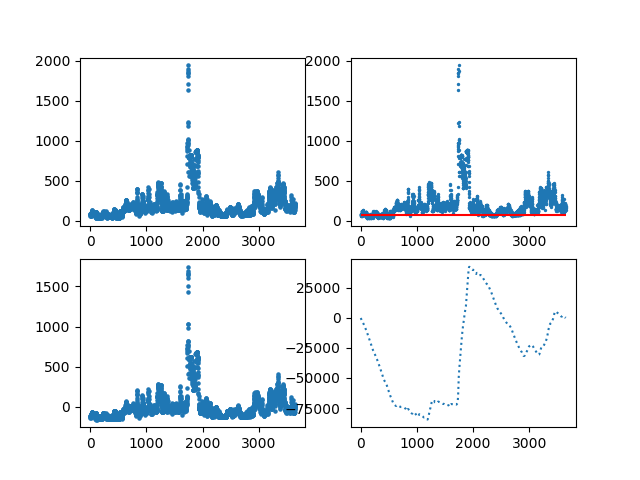

In [17]:

energia = energiadf["price"][0:3650]
#Graficas para el dataset de energia
plt.figure()
plt.subplot(221)
plt.scatter(serie_time, energia, marker = 'o', s = 5)

plt.subplot(222)
plt.hlines(prom_petro_price,0,3650,colors = 'red')
plt.scatter(serie_time, energia, marker = 'o', s = 2)

plt.subplot(223)
plt.scatter(serie_time, energia_dsp[0:3650], marker = 'o', s = 5)

plt.subplot(224)
plt.plot(serie_time, sum_cum_energia[0:3650], linestyle = 'dotted')

plt.show()


Vn 25.0


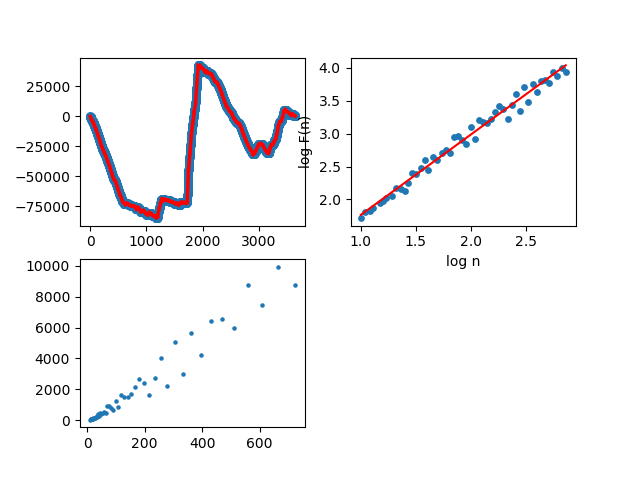

In [18]:

plt.figure(2)
plt.subplot(223)
plt.scatter(tamVenSug, Fn, marker = 'o', s = 5)
plt.figure(2)
ax21 = plt.subplot(221)
ax21.scatter(serie_time, sum_cum_energia[0:3650],marker = 'o', s = 30)

tv = int(len(tamVenSug)/5)
print("Vn",tamVenSug[tv])
calculo_por_ventanas(int(tamVenSug[tv]),sum_cum_energia,True,1)

plt.subplot(222)
plt.scatter(np.log10(tamVenSug), np.log10(Fn), marker = 'o', s = 15)
plt.xlabel('log n')
plt.ylabel('log F(n)')

rectaLog = np.polyfit(np.log10(tamVenSug), np.log10(Fn), 1)
fLog = np.poly1d(rectaLog)

ejeX = np.log10(tamVenSug)
ejeY = fLog(np.log10(tamVenSug))

plt.plot(ejeX, ejeY, color = 'red')


plt.show()

In [19]:
print("Finalmente el DFA del precio de la energia: %.3f"%(fLog[1]))

Finalmente el DFA del precio de la energia: 1.225
